In [198]:
import pandas as pd
import numpy as np
import sys,os
sys.path.append(os.path.expanduser("~")+"/ivpy/src")
from ivpy import *
from ivpy.extract import norm
import warnings
warnings.filterwarnings('ignore')

In [199]:
sys.path.append(os.path.expanduser("~")+"/collproc")
from coll import *

## Bounds dict

In [200]:
b = {}

# Intra-pocket variance

#### roughness

In [201]:
rf = pd.read_csv("/Users/damoncrockett/lmlproc/proc/texture/genome_roughness_768_250_501_21_divide.csv")

In [202]:
rf['catalog'] = [os.path.basename(item)[:-4].split("_")[0] for item in rf.localpath]

In [203]:
rf['roughnorm'] = norm(rf.roughness)

In [204]:
def rng(col, return_bounds=False):
    
    colmin = min(col)
    colmax = max(col)
    
    if return_bounds:
        return colmax-colmin, colmin, colmax
    
    return colmax - colmin

In [205]:
roughness_ranges = rf.groupby('catalog').agg(rng).reset_index().roughnorm

<AxesSubplot:>

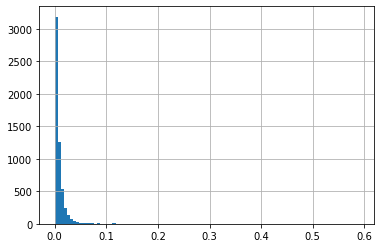

In [206]:
roughness_ranges.hist(bins=100)

In [207]:
np.std(roughness_ranges) * 4

0.07845667227286385

In [208]:
t = 0.1
incr = 0.0001
while True:
    t -= incr
    p = np.mean(roughness_ranges < t)
    if p < 0.95:
        print(t)
        break

0.027299999999998062


In [209]:
b['roughness'] = {
    "lower": round(rf.roughness.min(),4),
    "upper": round(rf.roughness.max(),4),
    "d": round(t,4)
}

In [210]:
b

{'roughness': {'lower': 0.0048, 'upper': 0.4897, 'd': 0.0273}}

#### dmin

In [211]:
cf = pd.read_csv("/Users/damoncrockett/lmlproc/proc/color/_OLD/colors.csv")

In [212]:
cf = cf[['cat','mloc','LAB_B','LAB_L']][cf.mloc!='dmax']

In [213]:
attach(cf,'cat')

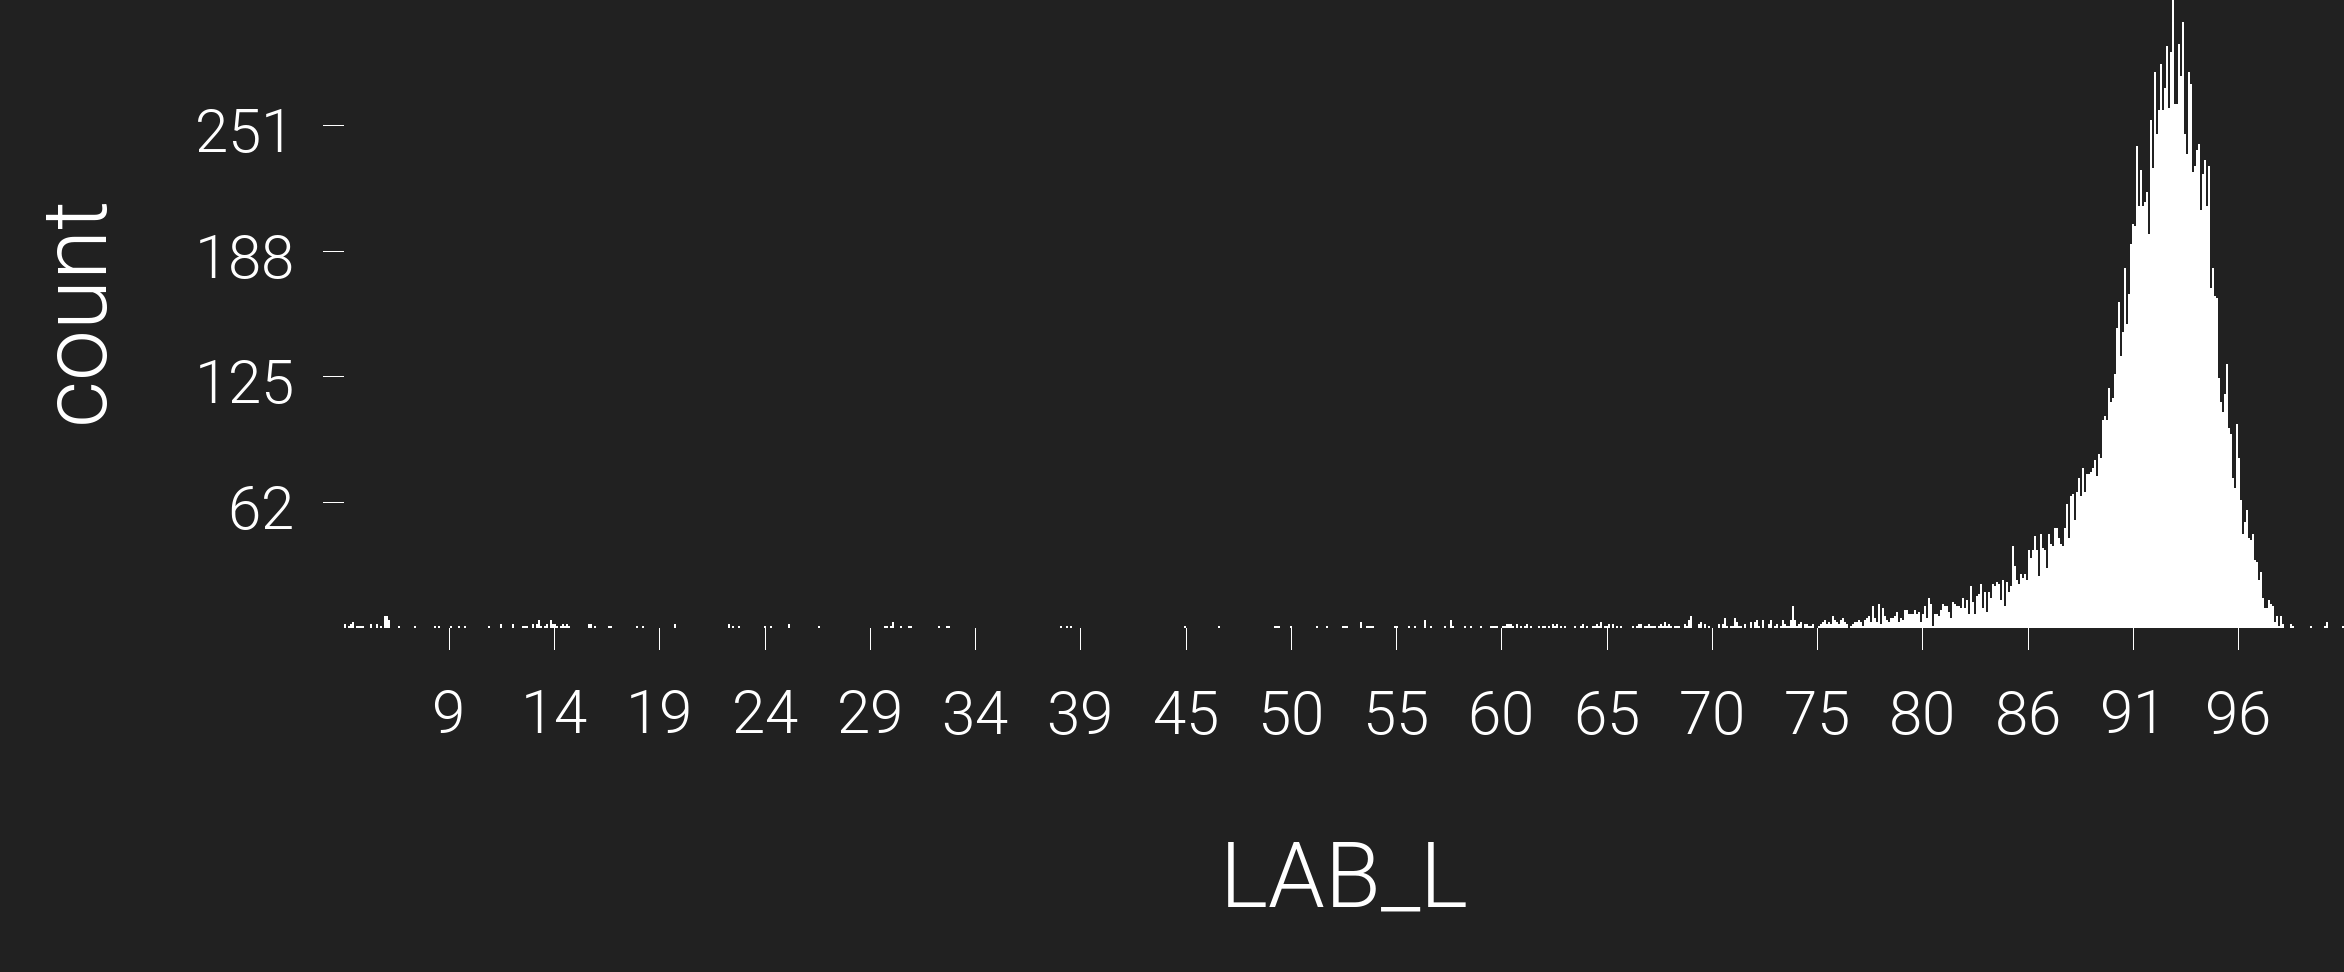

In [214]:
histogram(xcol='LAB_L',dot=True,thumb=2,bins=1000,xaxis=20)

In [215]:
cf = cf[cf.LAB_L>=75]

In [218]:
cf.LAB_B.max()

32.4

In [219]:
cf['LAB_B_norm'] = norm(cf['LAB_B'])

In [220]:
np.std(cf[['cat','LAB_B','LAB_B_norm']].groupby('cat').agg(rng).reset_index().LAB_B_norm) * 4

0.062461595769876546

In [221]:
color_ranges = cf[['cat','LAB_B','LAB_B_norm']].groupby('cat').agg(rng).reset_index().LAB_B_norm

In [222]:
t = 0.1
incr = 0.0001
while True:
    t -= incr
    p = np.mean(color_ranges < t)
    if p < 0.95:
        print(t)
        break

0.04299999999999837


In [223]:
b['bstar_base'] = {
    "lower": round(cf.LAB_B.min(),4),
    "upper": round(cf.LAB_B.max(),4),
    "d": round(t,4)
}

In [224]:
b

{'roughness': {'lower': 0.0048, 'upper': 0.4897, 'd': 0.0273},
 'bstar_base': {'lower': -7.28, 'upper': 32.4, 'd': 0.043}}

#### dmax

In [225]:
cf = pd.read_csv("/Users/damoncrockett/lmlproc/proc/color/_OLD/colors.csv")

In [226]:
cf = cf[['cat','mloc','LAB_B','LAB_L']][cf.mloc=='dmax']

In [227]:
attach(cf,'cat')

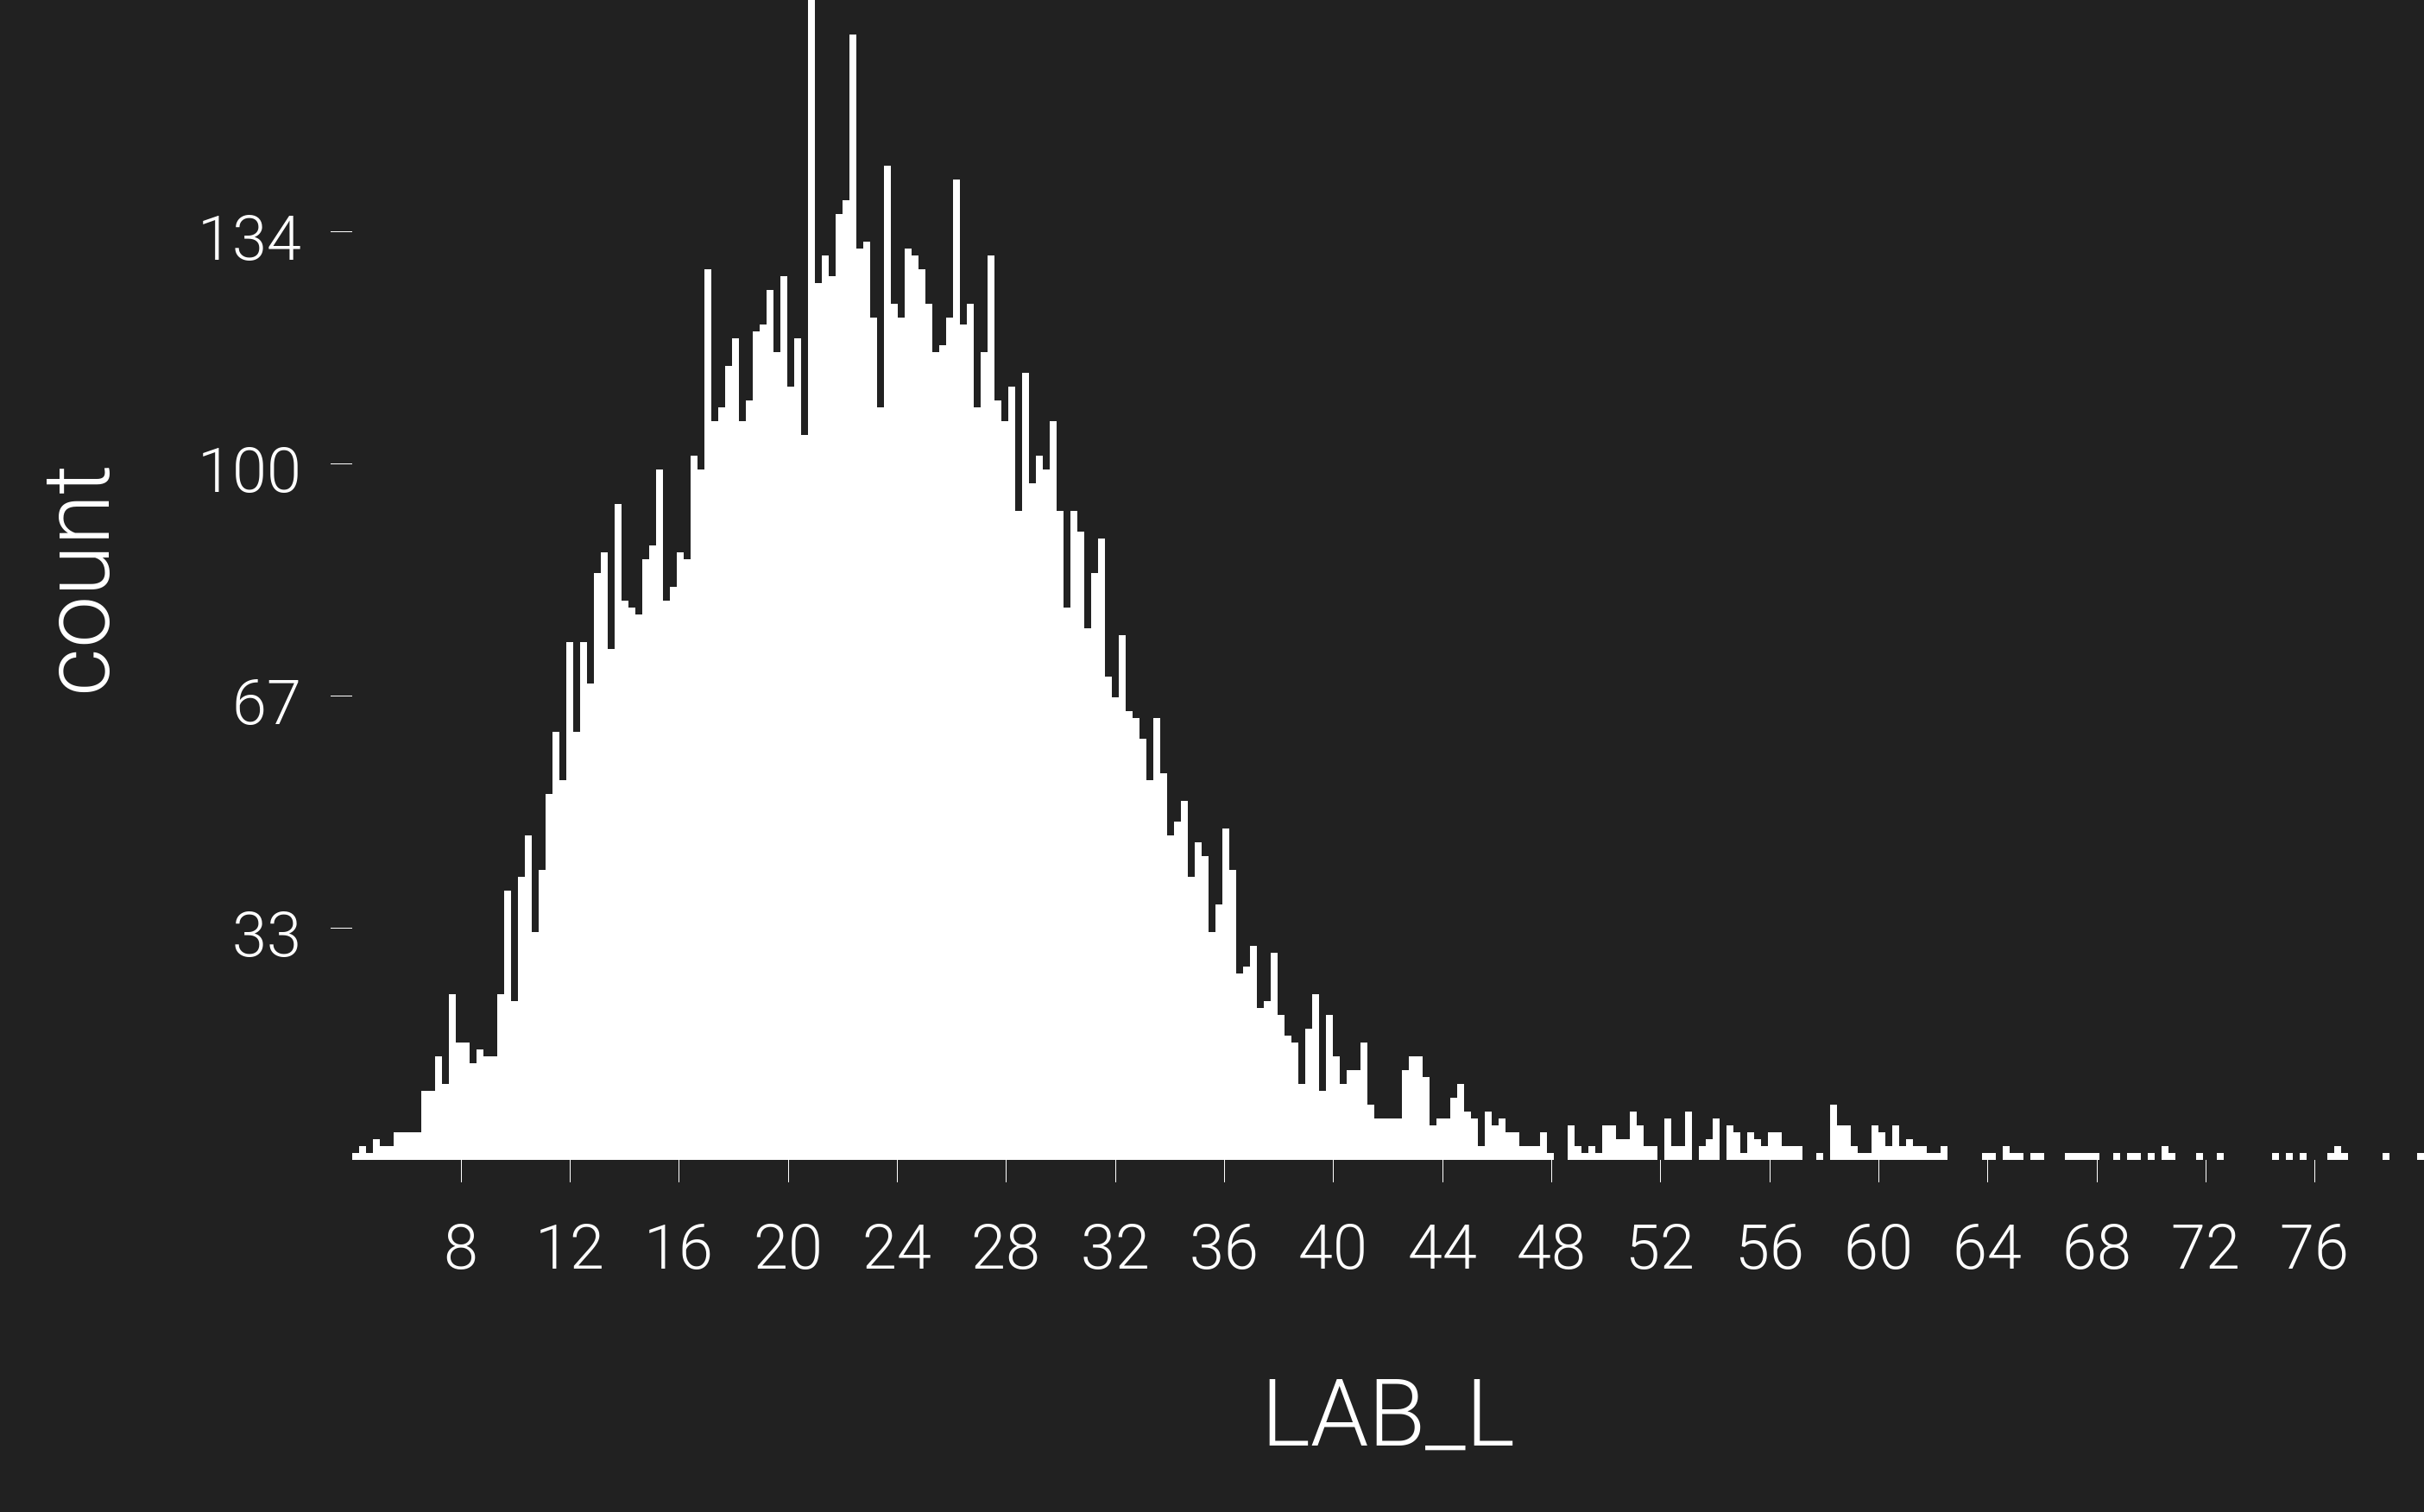

In [228]:
histogram(xcol='LAB_L',dot=True,thumb=8,bins=300,xaxis=20)

In [229]:
cf = cf[cf.LAB_L<=48]

<AxesSubplot:>

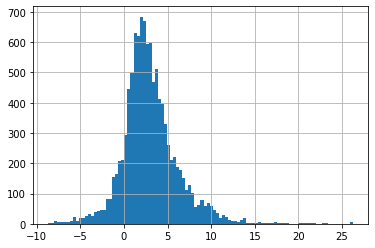

In [231]:
cf.LAB_B.hist(bins=100)

In [232]:
cf['LAB_B_norm'] = norm(cf['LAB_B'])

In [233]:
np.std(cf[['cat','LAB_B','LAB_B_norm']].groupby('cat').agg(rng).reset_index().LAB_B_norm) * 4

0.09923581533257027

In [234]:
color_ranges = cf[['cat','LAB_B','LAB_B_norm']].groupby('cat').agg(rng).reset_index().LAB_B_norm

In [235]:
t = 0.1
incr = 0.0001
while True:
    t -= incr
    p = np.mean(color_ranges < t)
    if p < 0.95:
        print(t)
        break

0.064999999999999


In [236]:
b['bstar_image'] = {
    "lower": round(cf.LAB_B.min(),4),
    "upper": round(cf.LAB_B.max(),4),
    "d": round(t,4)
}

In [237]:
b

{'roughness': {'lower': 0.0048, 'upper': 0.4897, 'd': 0.0273},
 'bstar_base': {'lower': -7.28, 'upper': 32.4, 'd': 0.043},
 'bstar_image': {'lower': -8.6815, 'upper': 26.23, 'd': 0.065}}

#### gloss

In [238]:
gf = pd.read_csv("/Users/damoncrockett/lmlproc/proc/gloss/_OLD/gloss_disagg.csv")

In [242]:
gf = gf[gf.g60 < 114]

In [243]:
gf['glossnorm'] = norm(gf.g60)

In [244]:
np.std(gf[['catalog','glossnorm']].groupby('catalog').agg(rng).reset_index().glossnorm) * 4

0.1540562855553182

In [245]:
gloss_ranges = gf[['catalog','glossnorm']].groupby('catalog').agg(rng).reset_index().glossnorm

<AxesSubplot:>

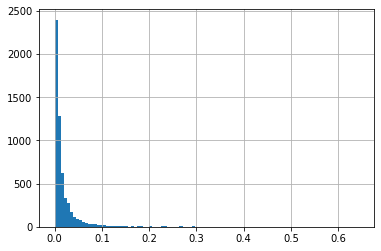

In [246]:
gloss_ranges.hist(bins=100)

In [247]:
t = 0.1
incr = 0.0001
while True:
    t -= incr
    p = np.mean(gloss_ranges < t)
    if p < 0.95:
        print(t)
        break

0.07599999999999932


In [248]:
b['gloss'] = {
    "lower": round(gf.g60.min(),4),
    "upper": round(gf.g60.max(),4),
    "d": round(t,4)
}

In [249]:
b

{'roughness': {'lower': 0.0048, 'upper': 0.4897, 'd': 0.0273},
 'bstar_base': {'lower': -7.28, 'upper': 32.4, 'd': 0.043},
 'bstar_image': {'lower': -8.6815, 'upper': 26.23, 'd': 0.065},
 'gloss': {'lower': 0.1588, 'upper': 113.9904, 'd': 0.076}}

#### thickness

In [300]:
tf = pd.read_csv("/Users/damoncrockett/lmlproc/proc/thickness/_OLD/thickness_disagg.csv")

In [301]:
from ast import literal_eval

In [302]:
tf.measurements = tf.measurements.apply(literal_eval)

In [303]:
tf.measurements = tf.measurements.apply(lambda x: [abs(item) for item in x if abs(item) < 1])

In [304]:
allt = [item for sublist in tf.measurements for item in sublist]

In [305]:
max(allt)

0.72

In [306]:
tf['tlen'] = tf.measurements.apply(len)

In [307]:
tf = tf[tf.tlen > 0]

In [314]:
tmin = min(allt)

In [316]:
tmax = max(allt)

In [317]:
trange = tmax - tmin

In [322]:
tf['mnorm'] = tf.measurements.apply(lambda x: [(item-tmin) / trange for item in x])

In [333]:
tf['mrange'] = tf.mnorm.apply(rng)

In [336]:
np.std(tf.mrange) * 4

0.09830606123072352

<AxesSubplot:>

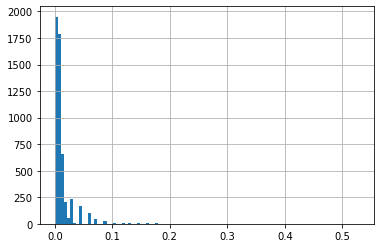

In [338]:
tf.mrange.hist(bins=100)

In [339]:
t = 0.1
incr = 0.0001
while True:
    t -= incr
    p = np.mean(tf.mrange < t)
    if p < 0.95:
        print(t)
        break

0.044099999999998404


In [340]:
b['thickness'] = {
    "lower": round(tmin,4),
    "upper": round(tmax,4),
    "d": round(t,4)
}

In [342]:
pkl(b,'d.pkl')

In [343]:
b

{'roughness': {'lower': 0.0048, 'upper': 0.4897, 'd': 0.0273},
 'bstar_base': {'lower': -7.28, 'upper': 32.4, 'd': 0.043},
 'bstar_image': {'lower': -8.6815, 'upper': 26.23, 'd': 0.065},
 'gloss': {'lower': 0.1588, 'upper': 113.9904, 'd': 0.076},
 'thickness': {'lower': 0.04, 'upper': 0.72, 'd': 0.0441}}